<a href="https://colab.research.google.com/github/ShravyaaKaranth/RainfallPrediction/blob/main/shravya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
df1=pd.read_csv("/content/export(1).csv",engine="python")
df1.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2016-01-01,26.8,20.1,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,27.1,18.8,35.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,26.9,19.5,35.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,27.5,20.6,35.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,26.7,19.8,35.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2535 non-null   object 
 1   tavg    2535 non-null   float64
 2   tmin    2457 non-null   float64
 3   tmax    2303 non-null   float64
 4   prcp    1529 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    1101 non-null   float64
 7   wspd    1768 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    1468 non-null   float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 218.0+ KB


In [ ]:
new = df1.drop(['snow', 'wpgt', 'tsun'], axis = 1)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2535 non-null   object 
 1   tavg    2535 non-null   float64
 2   tmin    2457 non-null   float64
 3   tmax    2303 non-null   float64
 4   prcp    1529 non-null   float64
 5   wdir    1101 non-null   float64
 6   wspd    1768 non-null   float64
 7   pres    1468 non-null   float64
dtypes: float64(7), object(1)
memory usage: 158.6+ KB


In [ ]:
new['tavg']=new['tavg'].interpolate()
new['tmin']=new['tmin'].interpolate()
new['tmax']=new['tmax'].interpolate()
new['prcp']=new['prcp'].interpolate()
new['wdir']=new['wdir'].interpolate()
new['wspd']=new['wspd'].interpolate()
new['pres']=new['pres'].interpolate()

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2535 non-null   object 
 1   tavg    2535 non-null   float64
 2   tmin    2535 non-null   float64
 3   tmax    2535 non-null   float64
 4   prcp    2517 non-null   float64
 5   wdir    2521 non-null   float64
 6   wspd    2529 non-null   float64
 7   pres    2479 non-null   float64
dtypes: float64(7), object(1)
memory usage: 158.6+ KB


In [ ]:
new[new['pres'].isnull()].index
new1 = new.dropna()

In [ ]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 56 to 2534
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2479 non-null   object 
 1   tavg    2479 non-null   float64
 2   tmin    2479 non-null   float64
 3   tmax    2479 non-null   float64
 4   prcp    2479 non-null   float64
 5   wdir    2479 non-null   float64
 6   wspd    2479 non-null   float64
 7   pres    2479 non-null   float64
dtypes: float64(7), object(1)
memory usage: 174.3+ KB


In [ ]:
new1.head()

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
56,2016-02-26,28.8,24.0,33.8,0.507042,260.203390,6.85,1012.00
57,2016-02-27,28.8,23.9,34.0,0.521127,265.779661,7.10,1011.76
58,2016-02-28,28.6,24.0,34.3,0.535211,271.355932,5.90,1011.52
59,2016-02-29,29.0,24.0,35.3,0.549296,276.932203,4.70,1011.28
60,2016-03-01,29.1,24.1,35.2,0.563380,282.508475,5.50,1011.04


In [ ]:
new1.corr()


,tavg,tmin,tmax,prcp,wdir,wspd,pres
tavg,1.000000,0.621129,0.769281,-0.450533,0.082172,0.147049,0.120999
tmin,0.621129,1.000000,0.170055,-0.136267,0.314004,0.128327,-0.291586
tmax,0.769281,0.170055,1.000000,-0.524319,-0.211620,0.010492,0.412477
prcp,-0.450533,-0.136267,-0.524319,1.000000,0.092557,0.138043,-0.349620
wdir,0.082172,0.314004,-0.211620,0.092557,1.000000,0.052553,-0.287408
wspd,0.147049,0.128327,0.010492,0.138043,0.052553,1.000000,-0.217411
pres,0.120999,-0.291586,0.412477,-0.349620,-0.287408,-0.217411,1.000000


In [ ]:
new1.to_csv('somenew.csv', index=False)

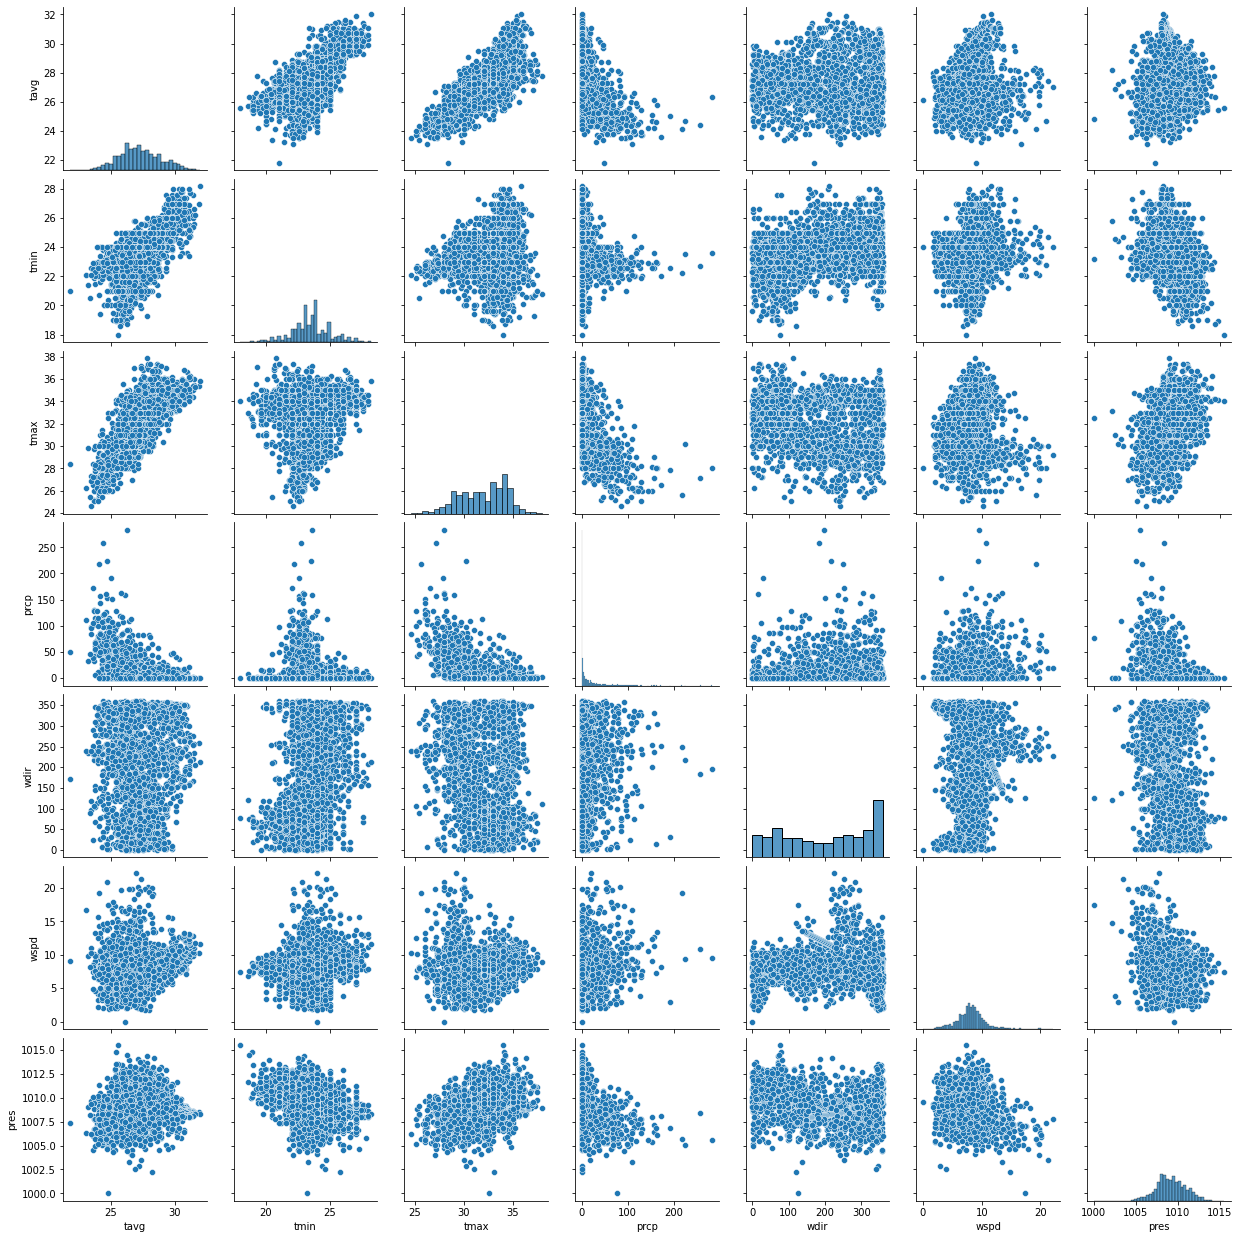

In [ ]:
sns.pairplot(new1)

In [ ]:
print(y.head(22))

56    0.507042
57    0.521127
58    0.535211
59    0.549296
60    0.563380
61    0.577465
62    0.591549
63    0.605634
64    0.619718
65    0.633803
66    0.647887
67    0.661972
68    0.676056
69    0.690141
70    0.704225
71    0.718310
72    0.732394
73    0.746479
74    0.760563
75    0.774648
76    0.788732
77    0.802817
Name: prcp, dtype: float64


In [ ]:
print(y.tail(5))

2530    0.0
2531    0.0
2532    0.0
2533    0.0
2534    0.8
Name: prcp, dtype: float64


In [ ]:
#zi = (xi – min(x))/ (max(x) – min(x))
y=new1['prcp']
x = new1.loc[:, ('tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres')]

x_list = []
print(x.iloc[0])
print(y.iloc[0])
#for i in range(y.count()):
# zi = (xi – min(x))/ (max(x) – min(x))

tavg      28.80000
tmin      24.00000
tmax      33.80000
wdir     260.20339
wspd       6.85000
pres    1012.00000
Name: 56, dtype: float64
0.5070422535211268


In [ ]:
sn=pd.read_csv("/content/somenew.csv",engine="python")
sn.head()

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2016-02-26,28.8,24.0,33.8,0.507042,260.203390,6.85,1012.00
1,2016-02-27,28.8,23.9,34.0,0.521127,265.779661,7.10,1011.76
2,2016-02-28,28.6,24.0,34.3,0.535211,271.355932,5.90,1011.52
3,2016-02-29,29.0,24.0,35.3,0.549296,276.932203,4.70,1011.28
4,2016-03-01,29.1,24.1,35.2,0.563380,282.508475,5.50,1011.04


In [ ]:
tavg_list = sn["tavg"].tolist()

21.8
32.0


In [ ]:
norm_tavg= []
for i in sn['tavg'].values:
  z = (i - min(tavg_list))/ (max(tavg_list) - min(tavg_list))
  norm_tavg.append(z)

0.6862745098039216
0.6862745098039216
0.6666666666666667
0.7058823529411764
0.715686274509804
0.7450980392156861
0.7745098039215685
0.7745098039215685
0.7254901960784312
0.7843137254901962
21.8


In [ ]:
tmin_list = sn["tmin"].tolist()
norm_tmin= []
for i in sn['tmin'].values:
  z = (i - min(tmin_list))/ (max(tmin_list) - min(tmin_list))
  norm_tmin.append(z)

# for i in range(10):
#   print(norm_tmin[i])

0.5882352941176471
0.5784313725490196
0.5882352941176471
0.5882352941176471
0.5980392156862747
0.8235294117647058
0.7352941176470589
0.6470588235294119
0.676470588235294
0.7254901960784312


In [ ]:
tmax_list = sn["tmax"].tolist()
norm_tmax= []
for i in sn['tmax'].values:
  z = (i - min(tmax_list))/ (max(tmax_list) - min(tmax_list))
  norm_tmax.append(z)

# for i in range(10):
#   print(norm_tmax[i])

0.6917293233082705
0.7067669172932332
0.7293233082706765
0.8045112781954886
0.7969924812030078
0.7067669172932332
0.8120300751879699
0.8120300751879699
0.8571428571428572
0.7518796992481205


In [ ]:
wdir_list = sn["wdir"].tolist()
norm_wdir= []
for i in sn['wdir'].values:
  z = (i - min(wdir_list))/ (max(wdir_list) - min(wdir_list))
  norm_wdir.append(z)

# for i in range(10):
#   print(norm_wdir[i])

0.7248005287757897
0.7403333175959587
0.7558661064161277
0.7713988952362968
0.7869316840564659
0.8024644728766347
0.8179972616968036
0.8335300505169728
0.8490628393371419
0.8645956281573108


In [ ]:
wspd_list = sn["wspd"].tolist()
norm_wspd= []
for i in sn['wspd'].values:
  z = (i - min(wspd_list))/ (max(wspd_list) - min(wspd_list))
  norm_wspd.append(z)

# for i in range(10):
#   print(norm_wspd[i])

0.30855855855855857
0.31981981981981983
0.26576576576576577
0.21171171171171171
0.24774774774774774
0.28378378378378377
0.30743243243243246
0.3310810810810811
0.3547297297297297
0.3783783783783784


In [ ]:
pres_list = sn["pres"].tolist()
norm_pres= []
for i in sn['pres'].values:
  z = (i - min(pres_list))/ (max(pres_list) - min(pres_list))
  norm_pres.append(z)

# for i in range(10):
#   print(norm_pres[i])

0.7741935483870968
0.7587096774193542
0.7432258064516117
0.7277419354838692
0.7122580645161267
0.6967741935483842
0.6812903225806416
0.6658064516129064
0.6503225806451639
0.6348387096774214


In [ ]:
prcp_list = sn["prcp"].tolist()
norm_prcp= []
for i in sn['prcp'].values:
  z = (i - min(prcp_list))/ (max(prcp_list) - min(prcp_list))
  norm_prcp.append(z)

# for i in range(10):
#   print(norm_prcp[i])

0.001787247985622583
0.001836893763000988
0.0018865395403793934
0.0019361853177577984
0.0019858310951362036
0.0020354768725146083
0.0020851226498930136
0.0021347684272714183
0.002184414204649824
0.0022340599820282287


In [ ]:
anan = pd.DataFrame()
anan['tavg'] = norm_tavg
anan['tmin'] = norm_tmin
anan['tmax'] = norm_tmax
anan['wdir'] = norm_wdir
anan['wspd'] = norm_wspd
anan['pres'] = norm_pres
anan['prcp'] = norm_prcp

anan.head()


,tavg,tmin,tmax,wdir,wspd,pres,prcp
0,0.686275,0.588235,0.691729,0.724801,0.308559,0.774194,0.001787
1,0.686275,0.578431,0.706767,0.740333,0.319820,0.758710,0.001837
2,0.666667,0.588235,0.729323,0.755866,0.265766,0.743226,0.001887
3,0.705882,0.588235,0.804511,0.771399,0.211712,0.727742,0.001936
4,0.715686,0.598039,0.796992,0.786932,0.247748,0.712258,0.001986


In [ ]:
from sklearn.model_selection import train_test_split
y= anan['prcp']
x = anan.loc[:, ('tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres')]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)
# print(x_train.head())


          tavg      tmin      tmax      wdir      wspd      pres
2041  0.441176  0.450980  0.330827  0.899721  0.270270  0.445161
1814  0.480392  0.392157  0.631579  0.206128  0.382883  0.767742
989   0.578431  0.401961  0.804511  0.615873  0.324324  0.622581
987   0.598039  0.411765  0.661654  0.631033  0.247748  0.654839
2377  0.460784  0.598039  0.406015  0.883008  0.680180  0.464516


In [ ]:
model = MLPRegressor()
model.fit(x_train, y_train)
print(model)

MLPRegressor()


In [ ]:
expected_y  = y_test
predicted_y = model.predict(x_test)
print(expected_y)
print(predicted_y)

438     0.000000
704     0.000000
1047    0.000104
452     0.015157
302     0.001032
          ...   
2266    0.001762
1292    0.001762
651     0.000000
1109    0.000601
890     0.067325
Name: prcp, Length: 496, dtype: float64
[-1.52028708e-02  8.38799300e-04  6.53905259e-03  1.56396876e-02
  7.89684939e-03 -1.80470258e-02 -5.22561698e-05  9.95945684e-03
  1.12572794e-01 -1.22009340e-02  9.45169772e-02  2.94652565e-02
  1.20510071e-01  2.91230313e-02 -3.19915030e-03 -1.30277436e-02
  1.03995597e-01  1.97656547e-02 -1.58860312e-02  6.68152404e-02
 -2.49485066e-02  3.77907082e-02  8.31927921e-02 -9.62947141e-03
  5.82623421e-02  1.01235705e-02  2.14105166e-02  2.54262803e-02
  4.04634230e-03  1.20212862e-02  1.69996896e-02  7.66069277e-02
 -5.13101478e-03  8.10676198e-02  1.11729927e-02 -4.61988509e-03
  1.01405177e-02  7.32151917e-03  2.43362232e-03  1.76006893e-02
  1.30864043e-01  1.82299270e-02  1.27346133e-01 -2.31249037e-03
  1.95800288e-01  4.99091064e-02  1.75493042e-02 -4.299174

In [ ]:
from sklearn import metrics
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.40159583483199024


ValueError: ignored

In [ ]:
y.describe()

count    2479.000000
mean       11.849144
std        24.619929
min         0.000000
25%         0.092045
50%         1.500000
75%        11.700000
max       283.700000
Name: prcp, dtype: float64

In [ ]:
y_train.describe()

count    1983.000000
mean       12.211896
std        25.355055
min         0.000000
25%         0.088436
50%         1.610714
75%        12.400000
max       283.700000
Name: prcp, dtype: float64

In [ ]:
#x=data['date'].tolist()

In [ ]:
#https://drive.google.com/file/d/1KnASVez-PI4eJmzpCWER-5wVWli5tA0F/view?usp=share_link  

In [ ]:
#https://drive.google.com/file/d/1eIfK6TzZU_GH2w0jmZHZfGKixoWjgOeZ/view?usp=share_link
#https://drive.google.com/file/d/1JBzoPQIRXn0jpHctjvnMcP5KMzo8br0Y/view?usp=share_link

